In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import utils
import forward_model
import globals
import gradient_descent
import least_squares
import section_search
import coordinate_descent
import initialization

import torch

cuda


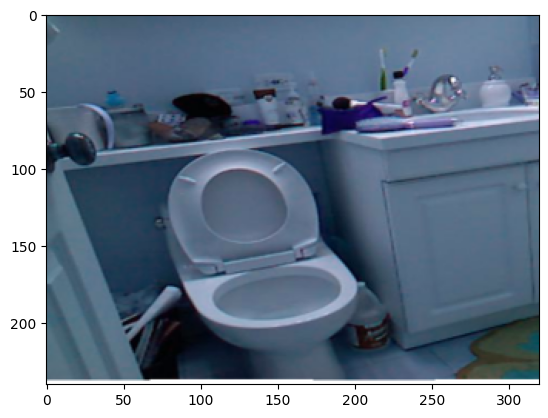

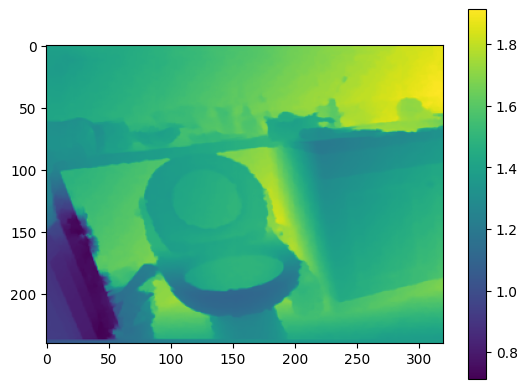

adaptive kernel size set to 11


In [2]:
globals.init_NYUv2()

# EXPERIMENT_NAME = 'coord-descent-bracket-search'
# experiment_folder = utils.create_experiment_folder(EXPERIMENT_NAME)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# load data 
# gt_aif, gt_dpt = utils.load_single_sample(sample='0045', set='train', fs=5, res='half')
gt_aif, gt_dpt, _ = utils.load_sample_image(fs=5, res='half')

plt.imshow(gt_aif)
plt.show()

plt.imshow(gt_dpt)
plt.colorbar()
plt.show()

width, height = gt_dpt.shape

max_kernel_size = utils.kernel_size_heuristic(width, height)
print('adaptive kernel size set to',max_kernel_size)
utils.update_max_kernel_size(max_kernel_size)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0075154924..1.0368509].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.009366989..1.0104787].


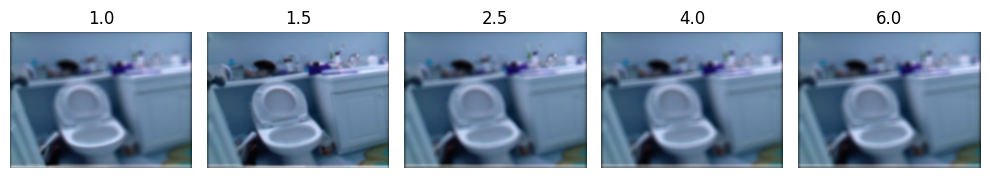

In [3]:
# forward model (torch)
FORWARD_KERNEL_TYPE = 'gaussian'
defocus_stack = forward_model.forward(gt_dpt, gt_aif, kernel=FORWARD_KERNEL_TYPE)
defocus_stack_torch = forward_model.forward_torch(gt_dpt, gt_aif, kernel=FORWARD_KERNEL_TYPE)#.float() / 255.0)
utils.plot_single_stack(defocus_stack_torch, globals.Df)



(240, 320, 5)


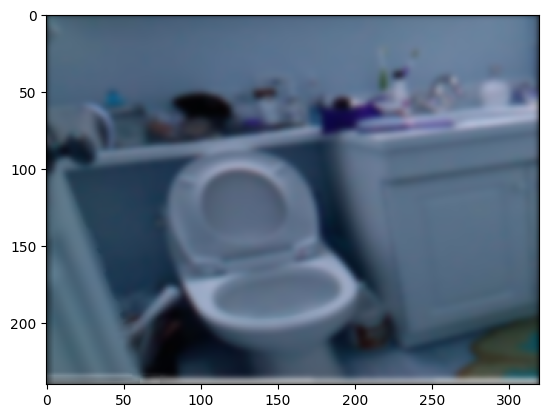

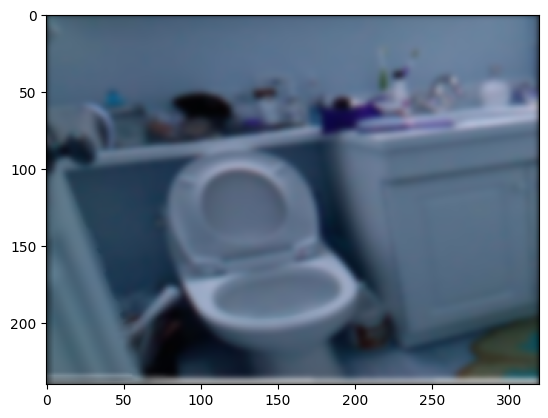

In [4]:
# AIF initialization

# aif_init = initialization.trivial_aif_initialization(defocus_stack)
aif_init = initialization.compute_aif_initialization(defocus_stack, lmbda=0.05, sharpness_measure='sobel_grad')

plt.imshow(defocus_stack[1]/255.)
plt.show()

In [5]:
# -------------------
# COORDINATE DESCENT
# -------------------

# depth_init = 1#torch.median(gt_dpt.cpu()).item()
# print('initializing depth to',depth_init)

dpt, aif = coordinate_descent.coordinate_descent(width, height, defocus_stack, show_plots=False,
                                                 save_plots=True, num_epochs=40,
                                                 least_squares_first=False, aif_init=aif_init,
                                                 finite_differences=False, num_Z=100, ls_maxiter=50, ls_maxiter_multiplier=1.075, 
                                                 use_CUDA=True)


Created experiment folder: experiments/coord-descent_2025-04-26_21-26-30
Iteration 0 



Grid search         : 100%|███████████████████| 100/100 [01:06<00:00,  1.50it/s]


Loss: 22.7943429311539

Golden-section search...
...searching for 100 % convergence
...done
Loss: 22.434382983466833 , TV: 32573.365632863242

DPT result range: [ 0.10172209268743165 , 9.998277907312568 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   1276.055175  24083.709735      50
  green   1283.821001  29146.898038      50
   blue   1299.056756  35255.668661      50

AIF result range: [ -109.32502868143118 , 433.2473011844739 ]
Loss: 4.309081402655127 , TV: 3554457.7483089855
Loss after clipping: 5.451510468499866 , TV: 3458016.9291113317

ls_maxiter updated to 53


--------------------------

Iteration 1 



Grid search         : 100%|███████████████████| 100/100 [01:21<00:00,  1.23it/s]


Loss: 3.195833469993525

Golden-section search...
...searching for 100 % convergence
...done
Loss: 2.9906808460453984 , TV: 33015.00808471228

DPT result range: [ 0.10172209268743165 , 9.998277907312568 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red    477.102243  24005.123808      53
  green    456.533796  29083.773467      53
   blue    455.383445  35190.697533      53

AIF result range: [ -43.7373715854499 , 297.52363638468523 ]
Loss: 0.5585275773072674 , TV: 2321314.831104037
Loss after clipping: 0.6026654017529094 , TV: 2304707.6718004844

ls_maxiter updated to 56


--------------------------

Iteration 2 



Grid search         : 100%|███████████████████| 100/100 [02:41<00:00,  1.61s/it]


Loss: 0.337628657527053

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.2322275508247311 , TV: 14623.205696483252

DPT result range: [ 0.10172209268743165 , 9.998277907312568 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red    153.043293  24056.906572      56
  green    147.498660  29123.938172      56
   blue    151.267157  35220.552799      56

AIF result range: [ -30.108763545003743 , 282.29332776717735 ]
Loss: 0.05907974069690305 , TV: 2129717.5630594003
Loss after clipping: 0.08953404547475859 , TV: 2114422.2804115424

ls_maxiter updated to 60


--------------------------

Iteration 3 



Grid search         : 100%|███████████████████| 100/100 [02:28<00:00,  1.49s/it]


Loss: 0.16893964490530886

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.06741649933844444 , TV: 7528.262825705649

DPT result range: [ 0.10172209268743165 , 9.998277907312568 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     90.057715  24067.492262      60
  green     87.374619  29132.748544      60
   blue     90.002251  35227.669436      60

AIF result range: [ -27.477483550762454 , 283.1365666290279 ]
Loss: 0.020698892087771474 , TV: 2094137.1773678784
Loss after clipping: 0.045502744388447446 , TV: 2080127.234022677

ls_maxiter updated to 64


--------------------------

Iteration 4 



Grid search         : 100%|███████████████████| 100/100 [02:32<00:00,  1.52s/it]


Loss: 0.13983992897858635

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.04098622110643652 , TV: 5021.536747633279

DPT result range: [ 0.10172209268743165 , 9.998277907312568 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     66.055688  24071.746303      64
  green     64.902220  29136.509188      64
   blue     66.483242  35230.856269      64

AIF result range: [ -24.38602859732553 , 287.6235519502748 ]
Loss: 0.011280967496767429 , TV: 2088116.7837168933
Loss after clipping: 0.03202421977428807 , TV: 2074670.8490577731

ls_maxiter updated to 68


--------------------------

Iteration 5 



Grid search         : 100%|███████████████████| 100/100 [02:27<00:00,  1.48s/it]


Loss: 0.12849185345638703

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.03042887954656049 , TV: 3942.9494904071853

DPT result range: [ 0.10172209268743165 , 9.896555814625136 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     52.967595  24074.344099      68
  green     51.867666  29138.710289      68
   blue     52.939793  35232.603548      68

AIF result range: [ -23.058516015865017 , 276.12442143178544 ]
Loss: 0.007203509885593091 , TV: 2088079.723090465
Loss after clipping: 0.024527900898836486 , TV: 2075181.0311087673

ls_maxiter updated to 73


--------------------------

Iteration 6 



Grid search         : 100%|███████████████████| 100/100 [02:30<00:00,  1.50s/it]


Loss: 0.12114280115504482

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.023743601282474817 , TV: 3562.1849932673986

DPT result range: [ 0.10172209268743165 , 6.6034441853748636 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     43.010808  24076.468046      73
  green     41.655903  29140.448395      73
   blue     42.263018  35233.905091      73

AIF result range: [ -20.922081595603984 , 268.914310636251 ]
Loss: 0.004662593132478972 , TV: 2087664.8018638138
Loss after clipping: 0.01876815016533348 , TV: 2075396.6962412596

ls_maxiter updated to 78


--------------------------

Iteration 7 



Grid search         : 100%|███████████████████| 100/100 [02:44<00:00,  1.64s/it]


Loss: 0.11507584148021362

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.018123622156458713 , TV: 3124.080885172696

DPT result range: [ 0.10172209268743165 , 5.1034441853748636 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     35.037084  24078.497875      78
  green     34.058864  29142.071752      78
   blue     34.994091  35235.238421      78

AIF result range: [ -18.87132859808744 , 268.83399047848167 ]
Loss: 0.0031355820883234315 , TV: 2087277.3279416445
Loss after clipping: 0.015534059530528593 , TV: 2075360.3979413188

ls_maxiter updated to 83


--------------------------

Iteration 8 



Grid search         : 100%|███████████████████| 100/100 [02:42<00:00,  1.62s/it]


Loss: 0.11206254908433705

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.015353896282309874 , TV: 2818.854565766434

DPT result range: [ 0.10172209268743165 , 4.731308230375284 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     31.193633  24080.145486      83
  green     30.396652  29143.496172      83
   blue     31.427189  35236.303980      83

AIF result range: [ -17.81558698855503 , 268.709949533378 ]
Loss: 0.0025040519149077704 , TV: 2088308.5223876853
Loss after clipping: 0.0134904984107353 , TV: 2076753.638123562

ls_maxiter updated to 89


--------------------------

Iteration 9 



Grid search         : 100%|███████████████████| 100/100 [02:40<00:00,  1.60s/it]


Loss: 0.1100436516061397

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.013404721910611143 , TV: 2708.331879958357

DPT result range: [ 0.10172209268743165 , 9.998277907312568 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     28.620543  24081.856246      89
  green     27.892596  29145.001530      89
   blue     28.865955  35237.449224      89

AIF result range: [ -16.123039831869647 , 268.57964729781185 ]
Loss: 0.0021097013477439047 , TV: 2090523.0536407158
Loss after clipping: 0.011842029969065977 , TV: 2079381.5370273748

ls_maxiter updated to 95


--------------------------

Iteration 10 



Grid search         : 100%|███████████████████| 100/100 [02:58<00:00,  1.79s/it]


Loss: 0.10838152535219531

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.011788221594235215 , TV: 2535.0741154260754

DPT result range: [ 0.10172209268743165 , 4.790983005625053 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     26.631761  24083.418716      95
  green     25.958788  29146.340920      95
   blue     26.945472  35238.476881      95

AIF result range: [ -15.04773979529038 , 268.38352073488863 ]
Loss: 0.0018308748954758136 , TV: 2093448.7342029978
Loss after clipping: 0.010405054451612016 , TV: 2082711.6814674279

ls_maxiter updated to 102


--------------------------

Iteration 11 



Grid search         : 100%|███████████████████| 100/100 [03:00<00:00,  1.80s/it]


Loss: 0.10694005838989395

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.010361635235327146 , TV: 2417.7156533349003

DPT result range: [ 0.10172209268743165 , 9.003444185374864 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     24.658299  24085.281703     102
  green     24.124007  29147.498355     102
   blue     25.146305  35239.511238     102

AIF result range: [ -13.940820014271994 , 268.09960696381324 ]
Loss: 0.001581889469953321 , TV: 2096743.5277030277
Loss after clipping: 0.009050147264381279 , TV: 2086409.544531182

ls_maxiter updated to 109


--------------------------

Iteration 12 



Grid search         : 100%|███████████████████| 100/100 [03:03<00:00,  1.84s/it]


Loss: 0.10547785245336569

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.009020929925250993 , TV: 2241.746443318948

DPT result range: [ 0.10172209268743165 , 4.338196601125009 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     23.097973  24086.764590     109
  green     22.624349  29148.890313     109
   blue     23.574429  35240.588966     109

AIF result range: [ -12.778435057590894 , 267.841518349464 ]
Loss: 0.0013898710370950456 , TV: 2100597.147253558
Loss after clipping: 0.007937668185045956 , TV: 2090681.7371612657

ls_maxiter updated to 117


--------------------------

Iteration 13 



Grid search         : 100%|███████████████████| 100/100 [02:47<00:00,  1.68s/it]


Loss: 0.10433358665786371

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.007914697361776496 , TV: 2139.2356576589696

DPT result range: [ 0.10172209268743165 , 4.320162612375116 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     21.815853  24088.364131     117
  green     21.300301  29150.153746     117
   blue     22.195519  35241.650820     117

AIF result range: [ -11.959846957993117 , 267.4822595043002 ]
Loss: 0.0012346142411433884 , TV: 2105140.0347905317
Loss after clipping: 0.006956164454766183 , TV: 2095657.1836810163

ls_maxiter updated to 125


--------------------------

Iteration 14 



Grid search         : 100%|███████████████████| 100/100 [02:37<00:00,  1.58s/it]


Loss: 0.10329390486480446

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.006934863396689904 , TV: 2050.9674016861713

DPT result range: [ 0.10172209268743165 , 4.143769410125094 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     20.476654  24089.894983     125
  green     19.975549  29151.405121     125
   blue     20.791919  35242.595977     125

AIF result range: [ -11.231731251305023 , 267.01997414425176 ]
Loss: 0.0010856076613342217 , TV: 2109866.0111370105
Loss after clipping: 0.006056526489797258 , TV: 2100835.8288732655

ls_maxiter updated to 134


--------------------------

Iteration 15 



Grid search         : 100%|███████████████████| 100/100 [02:22<00:00,  1.43s/it]


Loss: 0.10233715829717825

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.006036574915411805 , TV: 1996.6628511839465

DPT result range: [ 0.10172209268743165 , 4.23819660112501 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     19.361858  24091.330725     134
  green     18.842913  29152.580911     134
   blue     19.594030  35243.482588     134

AIF result range: [ -10.836130154160902 , 267.3919598526007 ]
Loss: 0.0009668950211750753 , TV: 2114306.8193309745
Loss after clipping: 0.00534671059764086 , TV: 2105669.518901882

ls_maxiter updated to 144


--------------------------

Iteration 16 



Grid search         : 100%|███████████████████| 100/100 [02:39<00:00,  1.59s/it]


Loss: 0.1016138253819682

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.005334072102557934 , TV: 1936.7719868024506

DPT result range: [ 0.10172209268743165 , 5.703444185374863 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     18.274827  24092.742861     144
  green     17.824505  29153.751389     144
   blue     18.504173  35244.405086     144

AIF result range: [ -11.187303943783009 , 267.8502057926075 ]
Loss: 0.0008629225999782054 , TV: 2117919.705716989
Loss after clipping: 0.004722804232050273 , TV: 2109647.9869562946

ls_maxiter updated to 154


--------------------------

Iteration 17 



Grid search         : 100%|███████████████████| 100/100 [02:17<00:00,  1.38s/it]


Loss: 0.10099067956156423

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.004712209321113988 , TV: 1833.6646041030967

DPT result range: [ 0.10172209268743165 , 4.027050983124841 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     17.502571  24093.930414     154
  green     17.106547  29154.719452     154
   blue     17.759381  35245.179464     154

AIF result range: [ -11.094368421149422 , 268.63334317184984 ]
Loss: 0.0007937237169571783 , TV: 2120153.9130962826
Loss after clipping: 0.004245555463436636 , TV: 2112296.466875986

ls_maxiter updated to 165


--------------------------

Iteration 18 



Grid search         : 100%|███████████████████| 100/100 [02:16<00:00,  1.37s/it]


Loss: 0.10050506550695826

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.004238441903435622 , TV: 1780.7092328499702

DPT result range: [ 0.10172209268743165 , 4.6742645786248005 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     16.925204  24095.205607     165
  green     16.559103  29155.779739     165
   blue     17.113382  35245.966914     165

AIF result range: [ -10.80354667550039 , 268.6601337616328 ]
Loss: 0.0007409149414720692 , TV: 2122534.759163287
Loss after clipping: 0.003846225026671707 , TV: 2115048.256159558

ls_maxiter updated to 177


--------------------------

Iteration 19 



Grid search         : 100%|███████████████████| 100/100 [03:03<00:00,  1.83s/it]


Loss: 0.10005551476881364

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.0038396802138798403 , TV: 1701.010760777767

DPT result range: [ 0.10172209268743165 , 4.009016994374948 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     16.334007  24096.344254     177
  green     15.936668  29156.674235     177
   blue     16.439381  35246.729566     177

AIF result range: [ -10.943191123600766 , 268.49378715603837 ]
Loss: 0.0006866584255263272 , TV: 2124179.048952235
Loss after clipping: 0.0034127471201158715 , TV: 2117045.765550444

ls_maxiter updated to 190


--------------------------

Iteration 20 



Grid search         : 100%|███████████████████| 100/100 [02:40<00:00,  1.60s/it]


Loss: 0.09953103176086649

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.0034047202408402175 , TV: 1634.118143477121

DPT result range: [ 0.10172209268743165 , 4.296555814625137 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     15.627907  24097.472768     190
  green     15.309658  29157.621519     190
   blue     15.731278  35247.450815     190

AIF result range: [ -10.721387180918596 , 268.16068769089105 ]
Loss: 0.0006302866761161444 , TV: 2125156.7628098046
Loss after clipping: 0.0030227267616569718 , TV: 2118381.068214925

ls_maxiter updated to 204


--------------------------

Iteration 21 



Grid search         : 100%|███████████████████| 100/100 [03:04<00:00,  1.84s/it]


Loss: 0.09904101173279159

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.0030166036438337126 , TV: 1575.1230564624288

DPT result range: [ 0.10172209268743165 , 4.057546151624548 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     14.966101  24098.556423     204
  green     14.687945  29158.496870     204
   blue     15.072822  35248.158138     204

AIF result range: [ -10.378505573347516 , 268.0265170832329 ]
Loss: 0.0005789148899281062 , TV: 2125773.1142817843
Loss after clipping: 0.0027326052014850005 , TV: 2119304.154388801

ls_maxiter updated to 219


--------------------------

Iteration 22 



Grid search         : 100%|███████████████████| 100/100 [03:07<00:00,  1.88s/it]


Loss: 0.09862444555576377

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.0027281409409977454 , TV: 1530.4669378859867

DPT result range: [ 0.10172209268743165 , 4.009016994374948 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     14.458087  24099.576665     219
  green     14.197005  29159.336880     219
   blue     14.554552  35248.844446     219

AIF result range: [ -10.27531255258418 , 267.8841681116508 ]
Loss: 0.0005403005917999396 , TV: 2126156.490250332
Loss after clipping: 0.002509712492517535 , TV: 2119918.724826473

ls_maxiter updated to 235


--------------------------

Iteration 23 



Grid search         : 100%|███████████████████| 100/100 [03:26<00:00,  2.07s/it]


Loss: 0.09835737239680353

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.002507214838081139 , TV: 1485.3426967428418

DPT result range: [ 0.10172209268743165 , 4.009016994374948 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     14.134489  24100.544197     235
  green     13.876653  29160.140238     235
   blue     14.212368  35249.473097     235

AIF result range: [ -10.013790648978164 , 267.7706428464437 ]
Loss: 0.0005159172545442278 , TV: 2126815.3599085854
Loss after clipping: 0.0023182071580195884 , TV: 2120789.865935115

ls_maxiter updated to 252


--------------------------

Iteration 24 



Grid search         : 100%|███████████████████| 100/100 [03:17<00:00,  1.98s/it]


Loss: 0.09814093191962027

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.002315662178074259 , TV: 1441.1951898923674

DPT result range: [ 0.10172209268743165 , 4.009016994374948 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     13.823877  24101.421278     252
  green     13.583871  29160.799213     252
   blue     13.884365  35250.025756     252

AIF result range: [ -9.855543488062041 , 267.45807732486537 ]
Loss: 0.0004934000193050055 , TV: 2127243.783520994
Loss after clipping: 0.0021437769210065493 , TV: 2121413.590553884

ls_maxiter updated to 270


--------------------------

Iteration 25 



Grid search         : 100%|███████████████████| 100/100 [03:16<00:00,  1.97s/it]


Loss: 0.09793667185929922

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.002141890643381899 , TV: 1402.938383488875

DPT result range: [ 0.10172209268743165 , 4.254915028125263 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     13.584620  24102.204572     270
  green     13.363085  29161.442528     270
   blue     13.637900  35250.520955     270

AIF result range: [ -9.773006455141175 , 267.6752584860233 ]
Loss: 0.000476654816354643 , TV: 2127035.471641094
Loss after clipping: 0.002049769990463875 , TV: 2121276.3992064884

ls_maxiter updated to 290


--------------------------

Iteration 26 



Grid search         : 100%|███████████████████| 100/100 [06:11<00:00,  3.72s/it]


Loss: 0.09788293180066857

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.0020475746559547262 , TV: 1366.9673777684484

DPT result range: [ 0.10172209268743165 , 4.009016994374948 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     13.505083  24102.942346     290
  green     13.295753  29162.045819     290
   blue     13.541112  35250.998504     290

AIF result range: [ -9.514491792639603 , 267.7651526131135 ]
Loss: 0.0004709427878086301 , TV: 2126627.3331643883
Loss after clipping: 0.0019636053645853625 , TV: 2120968.0421158383

ls_maxiter updated to 311


--------------------------

Iteration 27 



Grid search         : 100%|███████████████████| 100/100 [03:06<00:00,  1.86s/it]


Loss: 0.09786365254315496

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.001960957231158273 , TV: 1340.2252171750474

DPT result range: [ 0.10172209268743165 , 4.009016994374948 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     13.353167  24103.704253     311
  green     13.151797  29162.655992     311
   blue     13.371418  35251.484196     311

AIF result range: [ -9.838679008306261 , 267.5047054209112 ]
Loss: 0.00046013162221987693 , TV: 2126313.7873318302
Loss after clipping: 0.001851925328031336 , TV: 2120826.725511374

ls_maxiter updated to 334


--------------------------

Iteration 28 



Grid search         : 100%|███████████████████| 100/100 [03:31<00:00,  2.12s/it]


Loss: 0.09768414636013525

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.001850628230218291 , TV: 1313.0489038972373

DPT result range: [ 0.10172209268743165 , 3.1339393538745695 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     13.199471  24104.414534     334
  green     13.006821  29163.220225     334
   blue     13.213144  35251.945378     334

AIF result range: [ -9.823663885577735 , 267.7555758284742 ]
Loss: 0.00044964469852289726 , TV: 2127181.9178926973
Loss after clipping: 0.001814740413063016 , TV: 2121700.4807076803

ls_maxiter updated to 359


--------------------------

Iteration 29 



Grid search         : 100%|███████████████████| 100/100 [02:55<00:00,  1.76s/it]


Loss: 0.09766969756663388

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.001813643883104929 , TV: 1310.127878826966

DPT result range: [ 0.10172209268743165 , 4.009016994374948 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     13.107130  24105.130581     359
  green     12.917802  29163.814289     359
   blue     13.118515  35252.424209     359

AIF result range: [ -9.30712373077816 , 267.61120510288714 ]
Loss: 0.0004433697807861725 , TV: 2128900.400607685
Loss after clipping: 0.0017608150226675636 , TV: 2123488.9037915617

ls_maxiter updated to 385


--------------------------

Iteration 30 



Grid search         : 100%|███████████████████| 100/100 [02:50<00:00,  1.71s/it]


Loss: 0.09761461976775973

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.0017603809303796698 , TV: 1285.2118268343543

DPT result range: [ 0.10172209268743165 , 3.1270509831248425 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     13.085714  24105.778651     385
  green     12.889803  29164.359793     385
   blue     13.078699  35252.853176     385

AIF result range: [ -9.135575482682988 , 267.69885814741497 ]
Loss: 0.00044135009623440594 , TV: 2132154.6688778903
Loss after clipping: 0.0017375559692467042 , TV: 2126779.3477702173

ls_maxiter updated to 413


--------------------------

Iteration 31 



Grid search         : 100%|███████████████████| 100/100 [02:39<00:00,  1.60s/it]


Loss: 0.09758122465367282

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.001736908774098122 , TV: 1286.5233884170927

DPT result range: [ 0.10172209268743165 , 4.009016994374948 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     13.126691  24106.432690     413
  green     12.920759  29164.873412     413
   blue     13.107796  35253.275777     413

AIF result range: [ -8.591169647201784 , 267.8568892242324 ]
Loss: 0.00044363749060483983 , TV: 2136773.8125082934
Loss after clipping: 0.0017627061647394 , TV: 2131350.7786358343

ls_maxiter updated to 443


--------------------------

Iteration 32 



Grid search         : 100%|███████████████████| 100/100 [02:30<00:00,  1.51s/it]


Loss: 0.09760539127575019

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.0017611538874406005 , TV: 1289.8709166602289

DPT result range: [ 0.10172209268743165 , 4.009016994374948 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     13.245594  24107.137759     443
  green     13.026195  29165.430821     443
   blue     13.207078  35253.723284     443

AIF result range: [ -7.732041768344147 , 267.8490738700666 ]
Loss: 0.000451002157940906 , TV: 2142997.173168891
Loss after clipping: 0.001882041238915757 , TV: 2137393.5244752453

ls_maxiter updated to 476


--------------------------

Iteration 33 



Grid search         : 100%|███████████████████| 100/100 [02:33<00:00,  1.54s/it]


Loss: 0.09775035453482063

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.001877266280783794 , TV: 1280.0419356020477

DPT result range: [ 0.10172209268743165 , 4.009016994374948 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     13.497452  24107.745831     476
  green     13.273507  29165.924263     476
   blue     13.461372  35254.136092     476

AIF result range: [ -7.413111704515986 , 268.78331984278947 ]
Loss: 0.0004683817976453944 , TV: 2151485.5462181177
Loss after clipping: 0.002001776415565082 , TV: 2145720.1592896422

ls_maxiter updated to 511


--------------------------

Iteration 34 



Grid search         : 100%|███████████████████| 100/100 [09:42<00:00,  5.82s/it]


Loss: 0.09792766066795298

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.0019975203955288146 , TV: 1276.3246520577609

DPT result range: [ 0.10172209268743165 , 4.009016994374948 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     13.864464  24108.267804     511
  green     13.592714  29166.347373     511
   blue     13.782008  35254.486129     511

AIF result range: [ -7.282964239554841 , 268.4035027824125 ]
Loss: 0.0004921259876408065 , TV: 2159932.4369663876
Loss after clipping: 0.0021891254617011687 , TV: 2153925.03987123

ls_maxiter updated to 549


--------------------------

Iteration 35 



Grid search         : 100%|███████████████████| 100/100 [10:04<00:00,  6.05s/it]


Loss: 0.09831597167513112

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.002185562678486686 , TV: 1260.0825886958266

DPT result range: [ 0.10172209268743165 , 3.1368810393753686 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     14.210516  24108.754274     549
  green     13.910215  29166.737694     549
   blue     14.089061  35254.815721     549

AIF result range: [ -7.348769121627954 , 268.23828623349357 ]
Loss: 0.0005155683082278909 , TV: 2166635.352017776
Loss after clipping: 0.0021989123842728075 , TV: 2160655.166169192

ls_maxiter updated to 590


--------------------------

Iteration 36 



Grid search         : 100%|███████████████████| 100/100 [10:13<00:00,  6.13s/it]


Loss: 0.09830206692442107

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.0021966510115791786 , TV: 1257.2944633656277

DPT result range: [ 0.10172209268743165 , 3.1368810393753686 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     14.311242  24109.263064     590
  green     14.004294  29167.160021     590
   blue     14.190499  35255.180245     590

AIF result range: [ -7.765752229838636 , 266.12999087146125 ]
Loss: 0.0005228319561357269 , TV: 2174343.084608338
Loss after clipping: 0.002365498497459695 , TV: 2168243.6665346837

ls_maxiter updated to 634


--------------------------

Iteration 37 



Grid search         : 100%|███████████████████| 100/100 [09:50<00:00,  5.90s/it]


Loss: 0.0985308995247494

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.0023643478488076398 , TV: 1259.7137676057419

DPT result range: [ 0.10172209268743165 , 3.1368810393753686 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     14.499554  24109.807974     634
  green     14.155570  29167.599397     634
   blue     14.341410  35255.553286     634

AIF result range: [ -8.722129710697523 , 267.56673220093575 ]
Loss: 0.0005349769765005075 , TV: 2183638.898747274
Loss after clipping: 0.0026086279685915005 , TV: 2177138.6984654902

ls_maxiter updated to 681


--------------------------

Iteration 38 



Grid search         : 100%|███████████████████| 100/100 [08:13<00:00,  4.94s/it]


Loss: 0.098959605751513

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.0026061881039076357 , TV: 1273.5233563280997

DPT result range: [ 0.10172209268743165 , 4.009016994374948 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     14.846055  24110.338852     681
  green     14.479689  29168.045729     681
   blue     14.665342  35255.950036     681

AIF result range: [ -10.801398944884724 , 271.4057000632585 ]
Loss: 0.0005600167275579213 , TV: 2195444.690581586
Loss after clipping: 0.0027182486260574944 , TV: 2188695.2670861157

ls_maxiter updated to 732


--------------------------

Iteration 39 



Grid search         : 100%|███████████████████| 100/100 [07:46<00:00,  4.66s/it]


Loss: 0.09895635259745103

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.002714321765866824 , TV: 1291.0396282619422

DPT result range: [ 0.10172209268743165 , 4.202128623625221 ]


Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     15.159441  24110.939024     732
  green     14.778434  29168.540286     732
   blue     14.969426  35256.404047     732

AIF result range: [ -13.139669847563969 , 274.28943276550825 ]
Loss: 0.0005835892403848723 , TV: 2210057.1696072784
Loss after clipping: 0.0031084252133718794 , TV: 2202707.831890135

ls_maxiter updated to 786


--------------------------



Removing outliers...
found 293 outliers


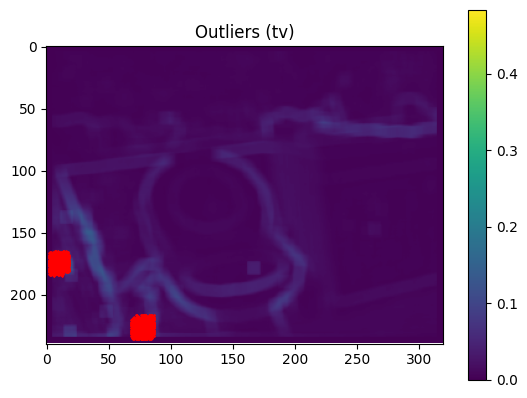

293 / 293 outliers removed


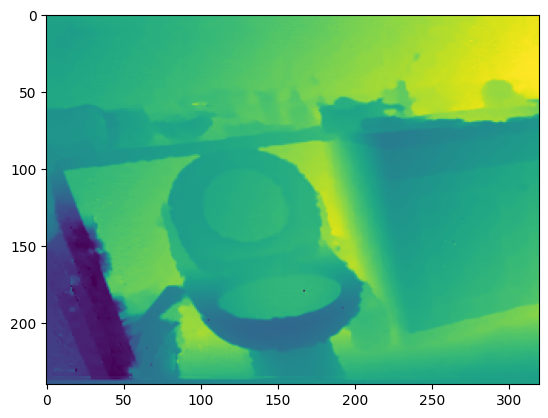

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red     20.142879  24126.492505    2500
  green     20.563374  29181.725248    2500
   blue     21.264316  35268.001079    2500
0.0011117703078187876


In [6]:
dpt_no_outliers = section_search.remove_outliers(dpt.cpu().numpy(), aif, diff_thresh = 2, tv_thresh = 0.15, patch_type = 'tv')
plt.imshow(dpt_no_outliers, vmin=0.7, vmax=1.9)
plt.show()

aif_last = least_squares.least_squares(torch.from_numpy(dpt_no_outliers), defocus_stack, maxiter=2500)

criterion = torch.nn.MSELoss()
recon = forward_model.forward_torch(torch.from_numpy(dpt_no_outliers), torch.from_numpy(aif_last))
loss = criterion(recon, defocus_stack_torch)
print(loss.item())

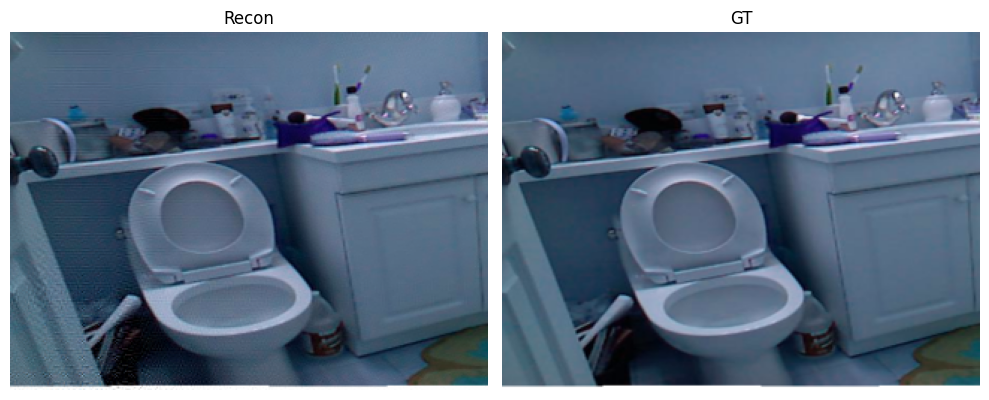

In [7]:
utils.plot_compare_rgb(aif_last, gt_aif)
plt.show()

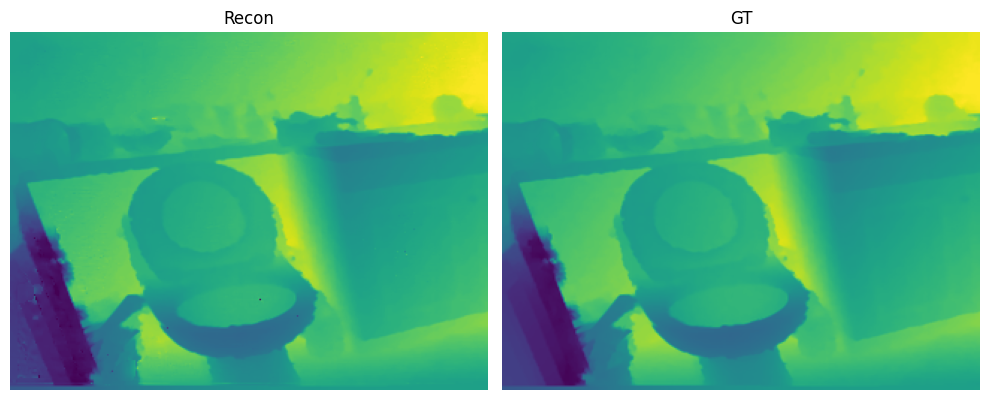

In [8]:
utils.plot_compare_greyscale(dpt_no_outliers, gt_dpt, vmin=0.7, vmax=1.9)
plt.show()

In [ ]:
print(loss.item())


Removing outliers...
found 726 outliers


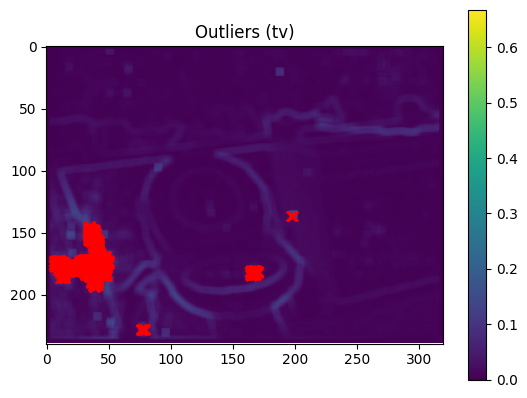

726 / 726 outliers removed


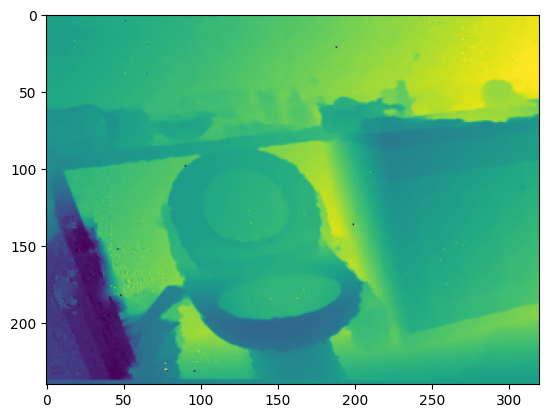

In [34]:
dpt_no_outliers = section_search.remove_outliers(depth_map_golden, aif_last, diff_thresh = 2, tv_thresh = 0.15, patch_type = 'tv')
plt.imshow(dpt_no_outliers, vmin=0.7, vmax=1.9)
plt.show()

In [ ]:
# worst_coords = utils.get_worst_diff_pixels(dpt.cpu(), gt_dpt,
#     num_worst_pixels = 20)

# _, Z, _, all_losses = section_search.grid_search(aif.cpu(), defocus_stack_torch.cpu())

indices = forward_model.precompute_indices(width, height)
defocus_stacks = torch.zeros((len(Z), 5, width, height, 3))
for k in range(len(Z)):
    defocus_stack_k = forward_model.forward_torch(torch.full((width,height), Z[k]).to(aif.device),
                                                  aif, indices=indices)

    defocus_stacks[k] = defocus_stack_k

for i, j in worst_coords[:5]:
    section_search.plot_grid_search_on_pixel(i.item(), j.item(), Z, all_losses, gt_dpt)
    
    i_min = max(0, i.item()-max_kernel_size//2)
    i_max = min(width, i.item()+max_kernel_size//2+1)
    j_min = max(0, j.item()-max_kernel_size//2)
    j_max = min(height, j.item()+max_kernel_size//2+1)
    plt.imshow(aif.cpu()[i_min:i_max, j_min:j_max] / 255.)
    plt.title("Local AIF region for ("+str(i.item())+", "+str(j.item())+")")
    plt.show()
    print('Red range:',aif.cpu()[i_min:i_max, j_min:j_max, 0].min().item(),
          '-',aif.cpu()[i_min:i_max, j_min:j_max, 0].max().item())
    print('Green range:',aif.cpu()[i_min:i_max, j_min:j_max, 1].min().item(),
          '-',aif.cpu()[i_min:i_max, j_min:j_max, 1].max().item())
    print('Blue range:',aif.cpu()[i_min:i_max, j_min:j_max, 2].min().item(),
          '-',aif.cpu()[i_min:i_max, j_min:j_max, 2].max().item())
    print('TV of AIF region:',section_search.total_variation_torch(aif[i_min:i_max, j_min:j_max]).item())
    # plt.imshow(gt_aif.cpu()[i_min:i_max, j_min:j_max] / 255.)
    # plt.title("GT local region for ("+str(i.item())+", "+str(j.item())+")")
    # plt.show()
    
    plt.imshow(dpt.cpu()[i_min:i_max, j_min:j_max], vmin=0.9, vmax=1.7)
    plt.title("Local DPT region for ("+str(i.item())+", "+str(j.item())+")")
    plt.show()
    print('TV of depth map region:',section_search.total_variation_torch(dpt[i_min:i_max, j_min:j_max]).item())

    
    # plt.imshow(defocus_stacks[:,:,i.item(),j.item(),:] / 255.)
    # plt.show()

    
    mse = torch.mean((defocus_stacks[:,:,i.item(),j.item(),:] - defocus_stack_torch[:,i.item(),j.item(),:]) ** 2, axis=2)
    # plt.imshow(mse)
    # plt.colorbar()
    # plt.show()

    fig, ax = plt.subplots(figsize=(10, 20))
    cax = ax.imshow(mse, cmap="viridis", aspect="auto", interpolation="nearest")
    
    cbar = plt.colorbar(cax, ax=ax, shrink=0.3)
    cbar.set_label("Color Scale")
    
    ax.set_yticks(np.arange(len(Z)))
    ax.set_yticklabels([np.round(z,2) for z in Z], fontsize=8)
    ax.set_ylabel('Z (Depth)', fontsize=10)
    
    ax.set_xticks(np.arange(len(globals.Df)))
    ax.set_xticklabels([df.item() for df in globals.Df], fontsize=8)
    ax.set_xlabel('d_f (Focus Setting in Focal Stack)', fontsize=10)
    
    ax.grid(which="minor", color="white", linestyle="-", linewidth=1)
    ax.set_xticks(np.arange(-0.5, 5, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 100, 1), minor=True)
    
    plt.show()



In [ ]:
plt.imshow((dpt.cpu()-gt_dpt.cpu())**2)
plt.colorbar()
plt.title('(DPT - GT DPT)^2')
plt.show()

In [ ]:
tol=0.1
for df in globals.Df:
    mask = np.abs(gt_dpt.detach().cpu().numpy() - df.item()) <= tol
    y_coords, x_coords = np.where(mask)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(gt_dpt.cpu(), vmin=0.9, vmax=1.7)
    plt.scatter(x_coords, y_coords, color='red', marker='x', s=10, label=f'Within ±{tol} of {df}m')
    plt.legend()
    plt.title('Points Close to '+str(df.item())+' m')
    plt.axis('off')
    plt.show()

In [ ]:
pad = max_kernel_size // 2
width, height, _ = aif.shape

gt_aif_tv_map = np.zeros((width, height))
aif_tv_map = np.zeros((width, height))
gt_tv_map = np.zeros((width, height))
tv_map = np.zeros((width, height))

for i in range(pad, width - pad):
    for j in range(pad, height - pad):
        gt_window = gt_aif.cpu()[i - pad:i + pad + 1, j - pad:j + pad + 1]
        gt_aif_tv_map[i, j] = coordinate_descent.total_variation_torch(gt_window).item()
        window = aif.cpu()[i - pad:i + pad + 1, j - pad:j + pad + 1]
        aif_tv_map[i, j] = coordinate_descent.total_variation_torch(window).item()
        
        gt_window = gt_dpt.cpu()[i - pad:i + pad + 1, j - pad:j + pad + 1]
        gt_tv_map[i, j] = coordinate_descent.total_variation_torch(gt_window).item()
        window = dpt.cpu()[i - pad:i + pad + 1, j - pad:j + pad + 1]
        tv_map[i, j] = coordinate_descent.total_variation_torch(window).item()

vmin = min(aif_tv_map.min(), gt_aif_tv_map.min())
vmax = max(aif_tv_map.max(), gt_aif_tv_map.max())
utils.plot_compare_greyscale((aif_tv_map - vmin) / (vmax-vmin), (gt_aif_tv_map - vmin) / (vmax-vmin))
# plt.title('TV of AIF')
plt.show()

vmin = min(tv_map.min(), gt_tv_map.min())
vmax = max(tv_map.max(), gt_tv_map.max())
utils.plot_compare_greyscale((tv_map - vmin) / (vmax-vmin), (gt_tv_map - vmin) / (vmax-vmin))
# plt.title('TV of depth maps')
plt.show()

In [ ]:
print(dpt.cpu()[i.item(),j.item()])
print(gt_dpt.cpu()[i.item(),j.item()])

In [ ]:
u, v, row, col, mask = indices

r = forward_model.computer(gt_dpt, globals.Df)
print(r.shape)
_, _, fs = r.shape
r = r.unsqueeze(-1).unsqueeze(-1)
    
G, _ = forward_model.computeG(r, u, v)
print(G.shape)

In [ ]:
print(r[i.item(),j.item()])

In [ ]:
num_plots = len(globals.Df)
fig, axes = plt.subplots(1, num_plots, figsize=(20, 5), constrained_layout=True)

vmin = 0#torch.min(G[222, 178, :, :, :]).item()
vmax = 0.05#torch.max(G[222, 178, :, :, :]).item()

# Plot each subplot with a shared color scale
for k in range(num_plots):
    im = axes[k].imshow(G[i.item(), j.item(), k, :, :].cpu(), vmin=vmin, vmax=vmax)  # Ensure it's on CPU for plotting
    axes[k].set_title(globals.Df[k].item())
    print(G[i.item(), j.item(), k, :, :].sum())

# Create a global colorbar
cbar = fig.colorbar(im, ax=axes, orientation="vertical", fraction=0.02, pad=0.02)
cbar.set_label("Color Scale")

# Show the figure
plt.title('Blur Kernels')
plt.show()

In [ ]:
utils.plot_single_stack(defocus_stack_torch[:,i_min:i_max,j_min:j_max,:], globals.Df, recon_max=255.)


In [ ]:
utils.plot_single_stack(forward_model.forward_torch(dpt.cpu(), aif.cpu())[:,i_min:i_max,j_min:j_max,:], globals.Df, recon_max=255.)


In [ ]:
print(u.shape, v.shape, r.shape, G.shape)

In [ ]:
print(defocus_stack_torch[i.item(),j.item()])

In [ ]:
forward_model.forward_torch(dpt.cpu(), aif.cpu())[:,i_min:i_max,j_min:j_max,:]